In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [79]:
iris_data = pd.read_csv('Iris.csv')  
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y = df["Species"].astype("category").cat.codes

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [87]:
svm = SVC(kernel="linear", C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

print("Accuracy:", svm.score(X_test_scaled, y_test))

Accuracy: 1.0


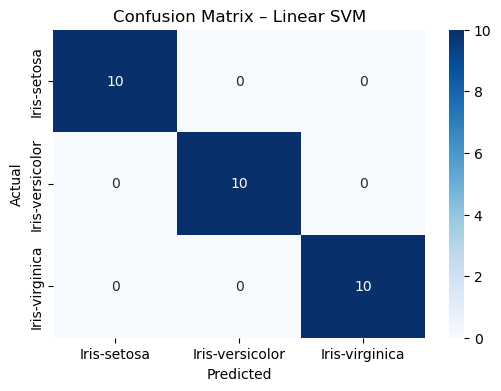

In [93]:
y_pred = svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=df["Species"].astype("category").cat.categories,
            yticklabels=df["Species"].astype("category").cat.categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Linear SVM")
plt.show()